# Failed Experiments

Shit goes wrong..

## 1. Uber random interim chains

The sampling procedure that we use is the following: we first sample the interim posterior of individual object parameters, then sample the hyperparameters using those interim chains to marginalize over the individual parameters via Monte Carlo integration and importance sampling.
We need to use long chains when sampling the individual galaxies because we want to make sure those chains are converged, but then we don't really need a whole lot of points to do the marginalization, so we just pick a subset of samples.
One might be tempted to extract a subsample by choosing points at random along the chain, using the numpy command 'numpy.random.choice'. If you do that, you can get biased results. Better to just thin the chain by, say, picking one every ten points.

## 2. Prior on source position ignores the size of the caustic

This is kind of a weird issue that I would like to test again. When sampling the individual lens we need to specify a prior for the source position. I used to just take a uniform prior on the position within a circle of a sufficiently large radius. I got a biased inference on the hyperparameters. Then I started using a dynamic prior: at each step of the chain, for a given set of lens structural parameters (stellar mass, halo mass..) I calculate the position of the radial caustic and I use that as an upper bound on the source position. The bias goes away.

## 3. Interim chains are too short

Running a 15000 sample chain for a 4 parameter model and a reasonably smooth posterior would seem like a reasonably conservative choice. It turns out if you run these chains a factor of 10 longer, even though they don't look any different from those shorter ones, you can get very different results when you do the full hierarchical inference, as you can see below here, or in Section 4 [here](https://github.com/astrosonnen/allZeLenses/blob/master/notebooks/NFW_halos_1.ipynb)

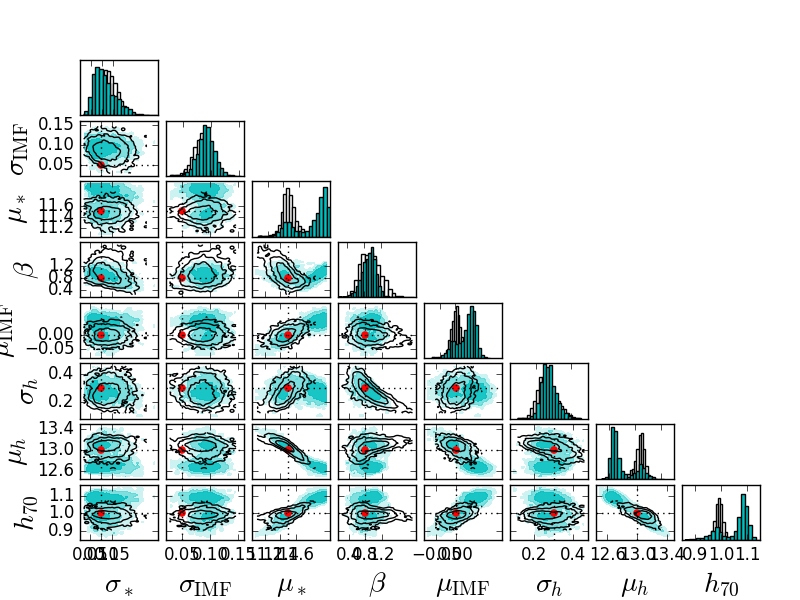

In [1]:
from IPython.display import Image
Image(filename="../allZeTests/short_vs_long_interim_chains_cp.png")

Colored contours: interim chains have 15000 samples, 5000 burn in. Empty contours: interim chains have 110000 samples, thinned by a factor of 10. Monte Carlo integration in the hierarchical inference step is done with 1000 samples obtained by thinning the chains by 10.

## 4. Dumb interim prior

Choosing a good interim prior can be tricky, especially when the same people that are creating the mock data are the ones fitting the data. Since we do not want to use information we're not supposed to have in real life to help our inference converge to the result we wish to recover, we can just use very uninformative interim priors, i.e. flat priors on everything. However, then we end up with interim samples in ridiculous regions of the parameter space, such as lenses with huge halo masses and no stars or vice versa. As the test in Sections 4 and 5 [here](https://github.com/astrosonnen/allZeLenses/blob/master/notebooks/NFW_halos_1.ipynb) suggests, this could be a source of bias. The bias can be avoided by using a more reasonable interim prior on the ratio between stellar and halo mass (just remember to divide it out when you do the hierarchical inference).